# Práctica NLP
Hecha por Rubén Cerezo Cuesta
En esta práctica, vamos a hacer dos modelos de NLP a partir de un dataset de Amazon formado por reseñas de videojuegos. Con esto, esperamos conseguir un análisis de sentimiento. Tras entrenar estos modelos, podremos conseguir una herramienta que catalogue reviews en función de cómo de positivas son. 
Este trabajo está dividido en 4 fases:
- Exploración de datos
- Preprocesamiento de datos
- División Train/Test y entrenamiento
- **Métricas y conclusiones**

En este caso, el corpus elegido, de Amazon, incluye reviews de videojuegos, simplemente por ser un tema que conozco y que he pensado que podría resultar fácil a la hora de reconocer el producto con el que trabajo. 

# Definimos funciones 
Creamos las funciones: 
load_model_artifacts
evaluate_loaded_model

In [2]:
# Creamos una función para cargar modelo, vectorizador y datos de test guardados

def load_model_artifacts(model_dir):
    """
    Carga el modelo, el vectorizador y los datos de test desde el directorio especificado.
    Parámetros:
    - model_dir: Ruta al directorio donde se encuentran los artefactos guardados.
    Retorna:
    - model: El modelo cargado.
    - vectorizer: El vectorizador cargado.
    - X_test_text: Los datos de test en formato de texto.
    - y_test: Las etiquetas de test.
    
    """
    import joblib
    import os

    # Cargar modelo
    model = joblib.load(os.path.join(model_dir, "model.pkl"))
    # Cargar vectorizador
    vectorizer = joblib.load(os.path.join(model_dir, "vectorizer.pkl"))
    # Cargar datos de test 
    X_test_text, y_test = joblib.load(os.path.join(model_dir, "test_data.pkl"))

    return model, vectorizer, X_test_text, y_test


In [3]:
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Ruta al directorio del modelo guardado

#Creamos una función para mostrar evaluación del modelo cargado
def evaluate_loaded_model(model, vectorizer, X_test_text, y_test):
    """
    Evalúa el modelo cargado utilizando los datos de test proporcionados.
    Parámetros:
    - model: El modelo cargado.
    - vectorizer: El vectorizador cargado.
    - X_test_text: Los datos de test en formato de texto.
    - y_test: Las etiquetas de test.
    Retorna:
    - None: Imprime las métricas de evaluación.
    """
    # Transformar los datos de test
    X_test_vec = vectorizer.transform(X_test_text)
    # Realizar predicciones
    y_pred = model.predict(X_test_vec)
    y_test = y_test.tolist()
    # Evaluación
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #ver matriz de confusión
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    return y_pred
    
# creamos una función para graficar las métricas de evaluación
def plot_metrics (y_test, y_pred):
    unique_classes = len(set(y_test))
    if unique_classes == 2:
        print ('clasificación binaria')
        plot_evaluation_metrics_binary (y_test, y_pred)
    else:
        print ('clasificación multiclase')
        plot_evaluation_metrics_multiclass (y_test, y_pred)

def plot_evaluation_metrics_multiclass(y_test, y_pred):
    """
    Grafica las métricas de evaluación del modelo.
    Parámetros:
    - y_test: Las etiquetas verdaderas.
    - y_pred: Las etiquetas predichas por el modelo.
    Retorna:
    - None: Muestra las gráficas de las métricas.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import precision_recall_fscore_support
    # Ajustamos el tamaño de y_pred para que acepte tanto modelos binarios como multiclase
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    classes = sorted(set(y_test))
    x = range(len(classes))
    # Gráfica de precisión, recall y f1-score
    plt.figure(figsize=(10, 6))
    plt.bar(x, precision, width=0.2, label='Precisión', align='center')
    plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', align='center')
    plt.bar([i + 0.4 for i in x], f1_score, width=0.2, label='F1-Score', align='center')
    plt.xticks([i + 0.2 for i in x], classes)
    plt.xlabel('Clases')
    plt.ylabel('Métricas')
    plt.title('Métricas de Evaluación por Clase')
    plt.legend()
    plt.show()

    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matriz de Confusión")
    plt.show()

def plot_evaluation_metrics_binary(y_test, y_pred):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import precision_recall_fscore_support

    # obtenemos precisión, recall y f1 por clase
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_test, y_pred, average=None, zero_division=0
    )

    classes = sorted(set(y_test))
    x = range(len(classes))

    # --- GRÁFICA PRECISIÓN / RECALL / F1 ---
    plt.figure(figsize=(8, 5))
    plt.bar(x, precision, width=0.25, label='Precisión')
    plt.bar([i + 0.25 for i in x], recall, width=0.25, label='Recall')
    plt.bar([i + 0.50 for i in x], f1_score, width=0.25, label='F1-Score')

    plt.xticks([i + 0.25 for i in x], classes)
    plt.title("Métricas de evaluación (Binario)")
    plt.legend()
    plt.show()

    # --- MATRIZ DE CONFUSIÓN ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Matriz de Confusión (Binario)")
    plt.show()


# Evaluación modelo TF-IDF + lr 
Observamos los resultados del modelo para 

Accuracy: 0.4248
              precision    recall  f1-score   support

           1       0.45      0.63      0.53       229
           2       0.36      0.29      0.32       255
           3       0.34      0.33      0.34       246
           4       0.45      0.33      0.38       263
           5       0.50      0.56      0.53       257

    accuracy                           0.42      1250
   macro avg       0.42      0.43      0.42      1250
weighted avg       0.42      0.42      0.42      1250

Matriz de confusión:
[[145  43  16  10  15]
 [ 88  75  52  13  27]
 [ 35  51  81  38  41]
 [ 26  24  64  86  63]
 [ 28  16  24  45 144]]
[4 1 3 ... 4 4 3]
clasificación multiclase


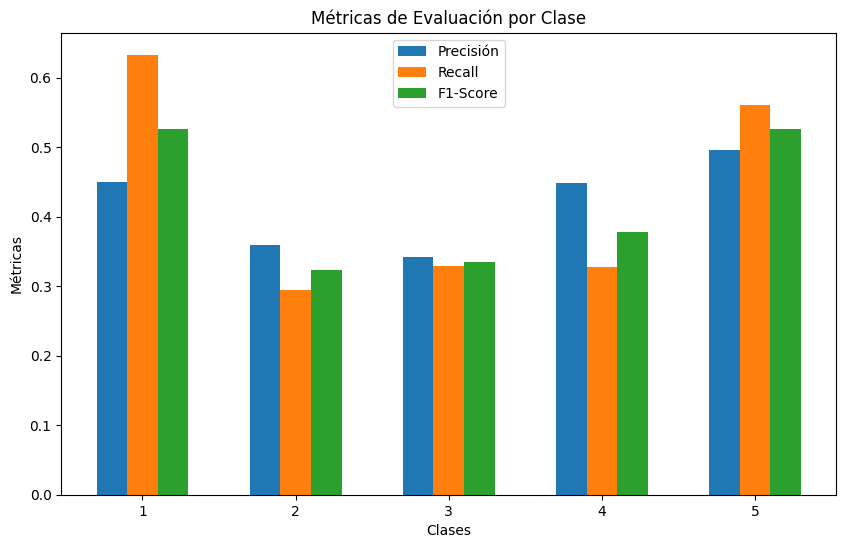

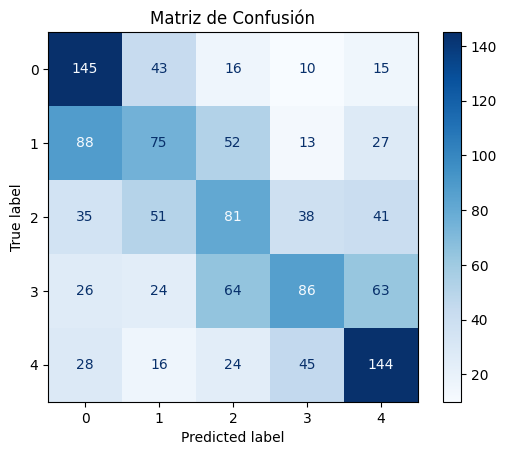

In [4]:
model_dir = r"C:\Users\rammu\Documents\projects\NLP_04\práctica\modelos\Logistic_regression_tf_idf0-5"
model, vectorizer, X_test_text, y_test = load_model_artifacts(model_dir)
print (evaluate_loaded_model(model, vectorizer, X_test_text, y_test))
y_pred = model.predict(vectorizer.transform(X_test_text))
plot_metrics(y_test, y_pred)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       504
           1       0.81      0.81      0.81       496

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

Matriz de confusión:
[[409  95]
 [ 95 401]]
[0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1
 1 0 0 0 0 1 0

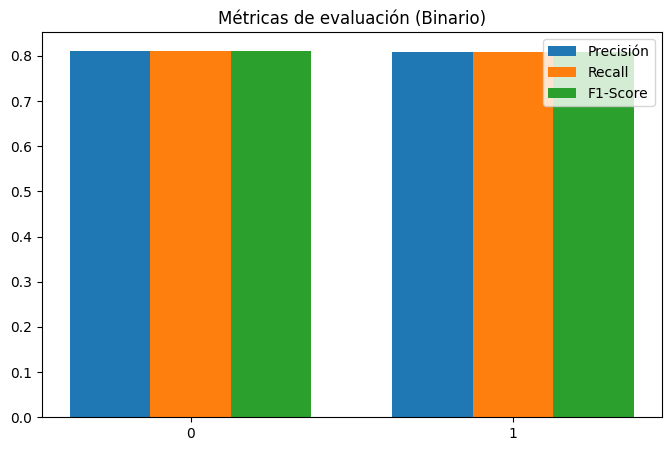

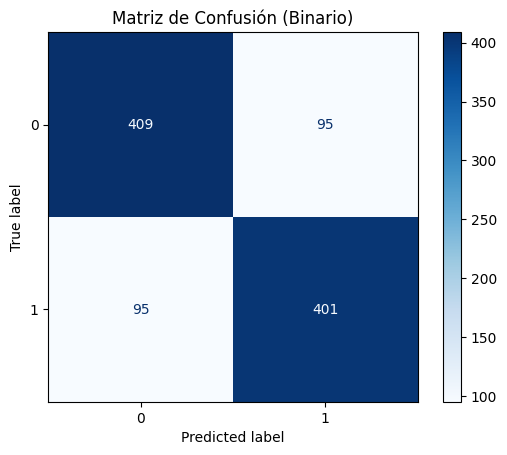

In [5]:
model_dir = r"C:\Users\rammu\Documents\projects\NLP_04\práctica\modelos\Logistic_regression_tf_idf0-1"
model, vectorizer, X_test_text, y_test = load_model_artifacts(model_dir)
print (evaluate_loaded_model(model, vectorizer, X_test_text, y_test))

# Hacemos la predicción correcta inmediatamente para evitar errores de longitud
y_pred_correct = model.predict(vectorizer.transform(X_test_text))
print("Check lengths (y_test, y_pred_correct):", len(y_test), len(y_pred_correct))
plot_metrics(y_test, y_pred_correct)


# Conclusiones: Métricas de nuestro modelo Logistic regression + TF IDF
Podemos observar en nuestro primer modelo (Logistic regression + TF IDF) que los resultados son súper positivos en nuestro modelo de 2 clases, y bastante peores en nuestro modelo de 5 clases. 
Esto se debe a que, probabilísticamente, al haber sólo 2 clases, es menos difícil "fallar" que con 5 clases. 
Además, recordemos que en nuestro dataset binario, con el que hemos entrenado el modelo binario, eliminamos las reseñas de 3 estrellas para quitar ruido al dataset, por considerarlas neutras 

## Resultados específicos del modelo 1-5 
- En la matriz de confusión y en la gráfica de evaluación por clase, las predicciones más acertadas corresponden a las puntuaciones extremas (1 y 5). Estas contienen un lenguaje más marcado, por lo que el modelo las identifica con mayor facilidad.
- Las puntuaciones donde peor calcula el sentimiento es en las puntuaciones intermedias (2-4), donde muestra muchos errores que debilitan el accuracy total 
- El accuracy es de 42,24. Esto es, mejor que elegir al azar, donde encontraríamos presumiblemente un resultado del 20%,pero aún muy limitado. 
- Una idea para reducir este problema, sería agrupar las clases en positivos, negativos y neutrales, dándonos una información un poco más específica que el modelo binario. 

## Resultados específicos del modelo binario 
- En este caso, el resultado es bastante bueno, con una accuracy del 0.81 (muy superior al anterior)
- El recall, del 0.81% muestra que el modelo detecta casi todos los positivos y negativos reales. 
- El F1- score nos muestra que el modelo es sólido y estable. 
- La matriz de confusión nos muestra que el número de falsos positivos y negativos es muy bajo. 
## Conclusiones: 
- El modelo binario es muy bueno, mucho mejor que el anterior, dado que está muy polarizado 


# Modelo countvectorizer + LR 
En este caso, vamos a analizar las métricas de nuestros modelos 

Accuracy: 0.4248
              precision    recall  f1-score   support

           1       0.45      0.63      0.53       229
           2       0.36      0.29      0.32       255
           3       0.34      0.33      0.34       246
           4       0.45      0.33      0.38       263
           5       0.50      0.56      0.53       257

    accuracy                           0.42      1250
   macro avg       0.42      0.43      0.42      1250
weighted avg       0.42      0.42      0.42      1250

Matriz de confusión:
[[145  43  16  10  15]
 [ 88  75  52  13  27]
 [ 35  51  81  38  41]
 [ 26  24  64  86  63]
 [ 28  16  24  45 144]]
[4 1 3 ... 4 4 3]
Check lengths (y_test, y_pred_correct): 1250 1250
clasificación multiclase


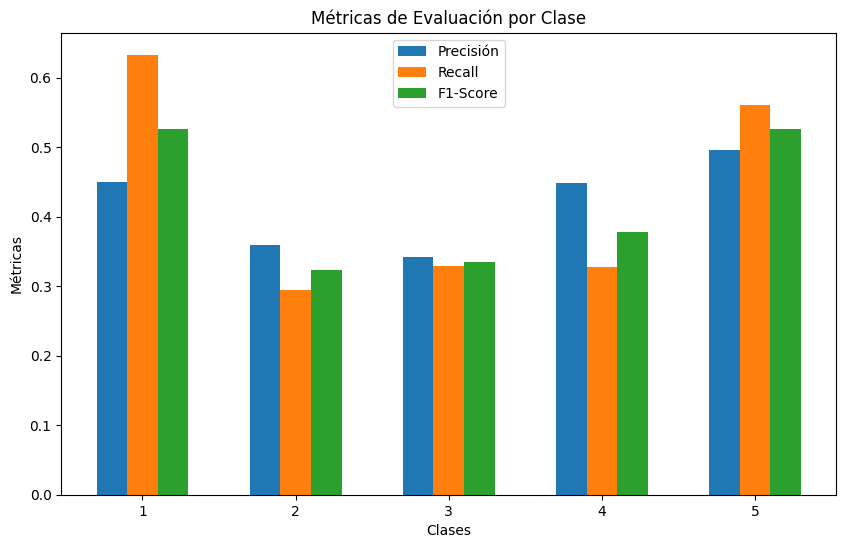

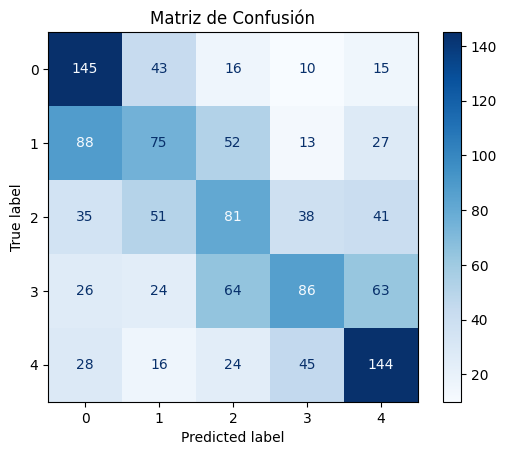

In [6]:
model_dir = r"C:\Users\rammu\Documents\projects\NLP_04\práctica\modelos\Logistic_regression_tf_idf0-5"
model, vectorizer, X_test_text, y_test = load_model_artifacts(model_dir)
print (evaluate_loaded_model(model, vectorizer, X_test_text, y_test))

# Hacemos la predicción correcta inmediatamente para evitar errores de longitud
y_pred_correct = model.predict(vectorizer.transform(X_test_text))
print("Check lengths (y_test, y_pred_correct):", len(y_test), len(y_pred_correct))
plot_metrics(y_test, y_pred_correct)


Accuracy: 0.788
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       500
           1       0.78      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000

Matriz de confusión:
[[389 111]
 [101 399]]
[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 0 

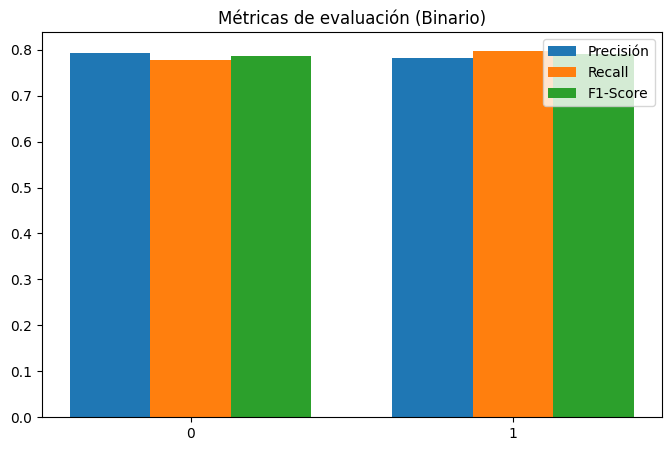

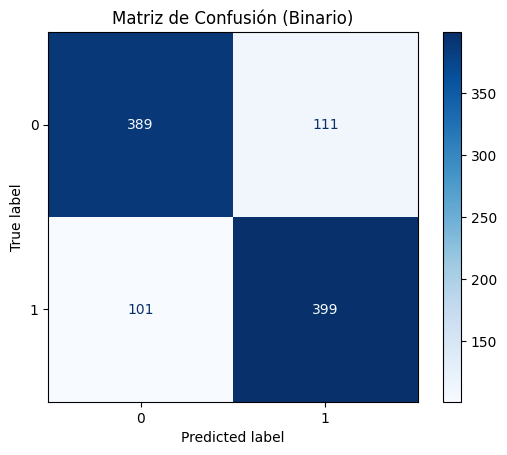

In [7]:
model_dir = r"C:\Users\rammu\Documents\projects\NLP_04\práctica\modelos\Logistic_regression_bag_of_words0-1"
model, vectorizer, X_test_text, y_test = load_model_artifacts(model_dir)
print (evaluate_loaded_model(model, vectorizer, X_test_text, y_test))

# Hacemos la predicción correcta inmediatamente para evitar errores de longitud
y_pred_correct = model.predict(vectorizer.transform(X_test_text))
print("Check lengths (y_test, y_pred_correct):", len(y_test), len(y_pred_correct))
plot_metrics(y_test, y_pred_correct)

# Conclusiones: Métricas de nuestro modelo Logistic regression + TF IDF
Podemos observar en nuestro primer modelo (Logistic regression + TF IDF) que los resultados son súper positivos en nuestro modelo de 2 clases, y bastante peores en nuestro modelo de 5 clases. 
Esto se debe a que, probabilísticamente, al haber sólo 2 clases, es menos difícil "fallar" que con 5 clases. 
Además, recordemos que en nuestro dataset binario, con el que hemos entrenado el modelo binario, eliminamos las reseñas de 3 estrellas para quitar ruido al dataset, por considerarlas neutras 

## Resultados específicos del modelo 1-5 
- En la matriz de confusión y en la gráfica de evaluación por clase, las predicciones más acertadas corresponden a las puntuaciones extremas (1 y 5). Estas contienen un lenguaje más marcado, por lo que el modelo las identifica con mayor facilidad.
- Las puntuaciones donde peor calcula el sentimiento es en las puntuaciones intermedias (2-4), donde muestra muchos errores que debilitan el accuracy total 
- El accuracy es de 42,24. Esto es, mejor que elegir al azar, donde encontraríamos presumiblemente un resultado del 20%,pero aún muy limitado. 
- Una idea para reducir este problema, sería agrupar las clases en positivos, negativos y neutrales, dándonos una información un poco más específica que el modelo binario. 

## Resultados específicos del modelo binario 
- En este caso, el resultado es bastante bueno, con una accuracy del 0.81 (muy superior al anterior)
- El recall, del 0.81% muestra que el modelo detecta casi todos los positivos y negativos reales. 
- El F1- score nos muestra que el modelo es sólido y estable. 
- La matriz de confusión nos muestra que el número de falsos positivos y negativos es muy bajo. 
## Conclusiones: 
- El modelo binario es muy bueno, mucho mejor que el anterior, dado que está muy polarizado 


In [14]:
import os

def tree(path, indent=""):
    items = os.listdir(path)
    for i, item in enumerate(items):
        full_path = os.path.join(path, item)
        connector = "└── " if i == len(items)-1 else "├── "
        print(indent + connector + item)
        if os.path.isdir(full_path):
            extension = "    " if i == len(items)-1 else "│   "
            tree(full_path, indent + extension)

# Usar así:
tree(r"C:\Users\rammu\Documents\projects\NLP_04\práctica")

├── 1.Exploración_de_datos.ipynb
├── 2.Preprocesado.ipynb
├── 3.0.Division_y_entrenamiento.ipynb
├── 3.1.division_y_entrenamiento0-1.ipynb
├── 4.métricas_y_conclusiones.ipynb
├── dataset
│   └── reviews_Video_Games_5.json.gz
├── funciones_preprocesamiento.py
├── logistic_regression_model.pkl
├── modelos
│   ├── DistilBERT_lr_0-1
│   │   ├── classification_report.json
│   │   ├── config.json
│   │   ├── confusion_matrix.csv
│   │   ├── distilbert
│   │   │   ├── config.json
│   │   │   └── model.safetensors
│   │   ├── logreg_model.joblib
│   │   ├── splits.json
│   │   ├── test_predictions.csv
│   │   └── tokenizer
│   │       ├── special_tokens_map.json
│   │       ├── tokenizer_config.json
│   │       └── vocab.txt
│   ├── DistilBERT_lr_0-5
│   ├── Logistic_regression_bag_of_words0-1
│   │   ├── model.pkl
│   │   ├── test_data.pkl
│   │   └── vectorizer.pkl
│   ├── Logistic_regression_bag_of_words0-5
│   │   ├── model.pkl
│   │   ├── test_data_raw.pkl
│   │   └── vectorizer.pkl
│   ├